# Daily Coding Problem #14

The area of a circle is defined as πr<sup>2</sup>. Estimate π to 3 decimal places using a Monte Carlo method.

Hint: The basic equation of a circle is x<sup>2</sup> + y<sup>2</sup> = r<sup>2</sup>.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Solution 1

In [2]:
def estimate_pi_quad(total, graph=True):
    x = np.random.rand(total)
    y = np.random.rand(total)
    
    x2 = x**2
    y2 = y**2
    sqrt = np.sqrt(x2 + y2)
    inside = len(sqrt[np.where(sqrt < 1)])
    
    if graph:
        plt.figure(figsize=(10,10))
        points =  plt.scatter(x, y, c='blue', alpha=.3, s=.1)
        circle = plt.Circle((0, 0), 1, color='red', linewidth=2, fill=False)

        ax = plt.gca()
        ax.cla()

        ax.add_artist(points)
        ax.add_artist(circle)

        plt.show()
    
    return round((float(inside) / total) * 4, 3)

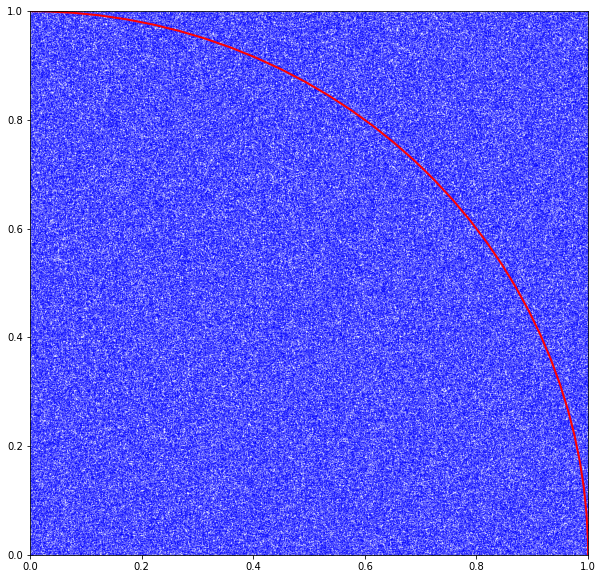

3.14

In [3]:
estimate_pi_quad(1000000)

## Solution 2

In [4]:
def estimate_pi_full(total):
    x = 1 - 2 * np.random.rand(total)
    y = 1 - 2 * np.random.rand(total)
    cond = x**2 + y**2
    
    insideX, insideY   = x[cond <= 1], y[cond <= 1]
    outsideX, outsideY = x[cond > 1], y[cond > 1]

    plt.figure(figsize=(10,10))
    plt.scatter(insideX, insideY, c='b', alpha=.2, s=.1)
    plt.scatter(outsideX, outsideY, c='r', alpha=.2, s=.1)
    
    plt.show()
    
    return round((float(len(insideX) + len(insideY)) / total) * 2, 3)

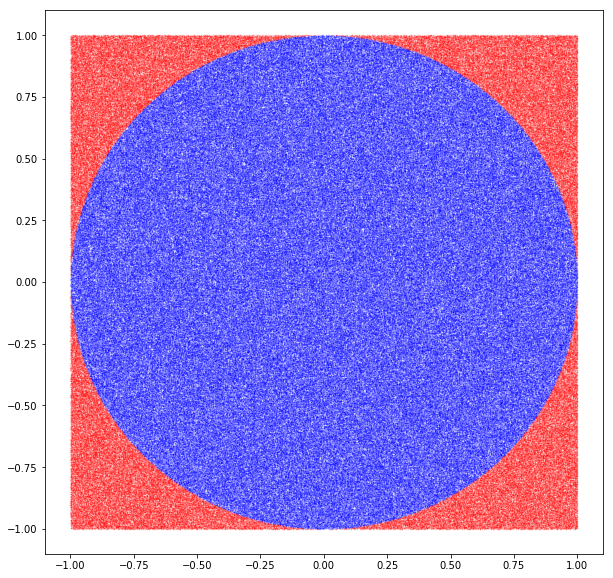

3.142

In [5]:
estimate_pi_full(1000000)

## Accuracy

In [6]:
x = np.logspace(0.0, 7.0, num=128, dtype=np.int64)
y = np.abs(np.array([estimate_pi_quad(n, False) for n in x]) - np.pi) / np.pi

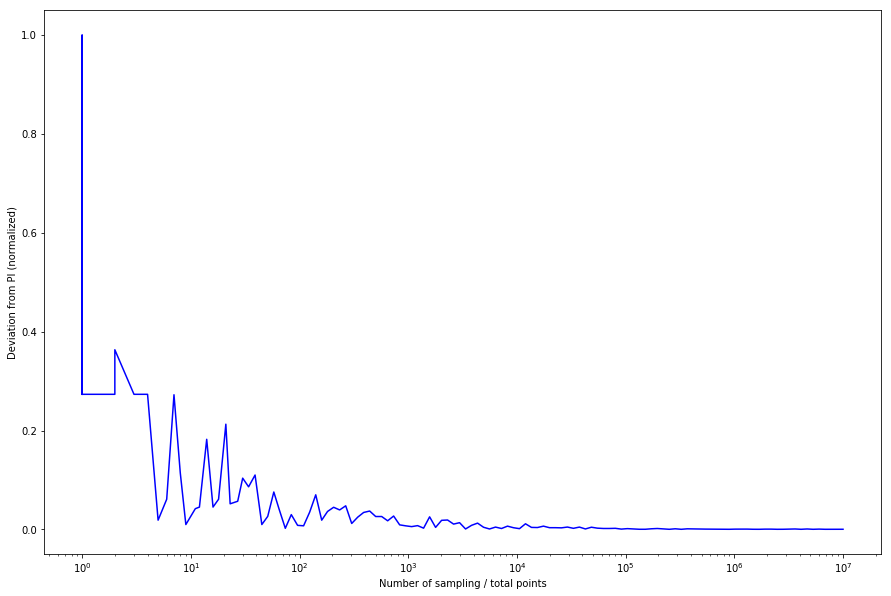

In [7]:
plt.figure(figsize=(15,10))
plt.plot(x, y, c='blue')
plt.xlabel('Number of sampling / total points')
plt.ylabel('Deviation from PI (normalized)')
plt.xscale('log')